In [ ]:
"""
Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing
"""

In [ ]:
"""
Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
"""

In [23]:
#Read the “housing.csv” file from the folder into the program
#Print first few rows of this data
import pandas as pd
houses_df=pd.read_excel("E:/Education/PGP Simplilearn-Purdue/PGP in Data Science/Data Science with Python/Projects/CA Housing Price Prediction/1553768847_housing.xlsx")
houses_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [41]:
#Extract input (X) and output (Y) data from the dataset
x=houses_df.iloc[:,0:9]
print(x.head())
y=pd.DataFrame(houses_df['median_house_value'])
print(y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  
0         322         126         8.3252        NEAR BAY  
1        2401        1138         8.3014        NEAR BAY  
2         496         177         7.2574        NEAR BAY  
3         558         219         5.6431        NEAR BAY  
4         565         259         3.8462        NEAR BAY  
   median_house_value
0              452600
1              358500
2              352100
3              341300
4              342200


In [25]:
#2. Handle missing values---Fill the missing values with the mean of the respective column
houses_df.isna().sum()
#There are 207 missing values in total_bedrooms column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [26]:
#Filling missing values in total_bedrooms with mean of the column
houses_df.total_bedrooms=houses_df.total_bedrooms.fillna(houses_df.total_bedrooms.mean())
houses_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [28]:
#3. Encode categorical data---Convert categorical column in the dataset to numerical data
houses_df.ocean_proximity.unique()
#ocean_proximity is the only categorical variable present in the data with 5 levels

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [30]:
#Encoding numerical data in ocean_proximity column
houses_df['ocean_proximity_num']=houses_df.ocean_proximity.map({'NEAR BAY':1, '<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5})
houses_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity_num
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,3
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,3
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,3
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,3


In [43]:
#Replacing categorical column with numerical column in 'X'
x.drop(['ocean_proximity'],axis=1,inplace=True)
x['ocean_proximity_num']=houses_df.ocean_proximity_num
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_num
0,-122.23,37.88,41,880,129.0,322,126,8.3252,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,1
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,3
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,3
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,3
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,3


In [47]:
#4. Split the dataset---Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512, 1)
(4128, 1)


In [51]:
#5. Standardize data---Standardize training and test datasets
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train_std = x_train.copy()
x_test_std = x_test.copy()

# numerical features
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

# apply standardization on numerical features
for i in num_cols:
    # fit on training data column
    scale = StandardScaler().fit(x_train_std[[i]])
    # transform the training data column
    x_train_std[i] = scale.transform(x_train_std[[i]])
    # transform the testing data column
    x_test_std[i] = scale.transform(x_test_std[[i]])

In [83]:
#6. Perform Linear Regression : 
#Perform Linear Regression on training data
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
houses_model=lm.fit(x_train_std,y_train)

#Predict output for test dataset using the fitted model
y_pred=houses_model.predict(x_test_std)
y_pred

#Print root mean squared error (RMSE) from Linear Regression
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("Accuracy:",metrics.r2_score(y_pred,y_test))

RMSE: 70512.73351946234
Accuracy: 0.4245221105833442


In [69]:
#Comparing actual vs predicted house prices
y_pred=pd.DataFrame(y_pred,columns=['Predicted'])
act_pred=pd.concat([y_test.reset_index(drop=True),y_pred],axis=1)
act_pred

,median_house_value,Predicted
0,167400,273845.760986
1,354100,272346.928566
2,160200,270050.659103
3,140800,141387.054790
4,107800,168226.899807
...,...,...
4123,106300,118735.485159
4124,393700,322759.174677
4125,131300,228707.072915
4126,92300,113277.776974


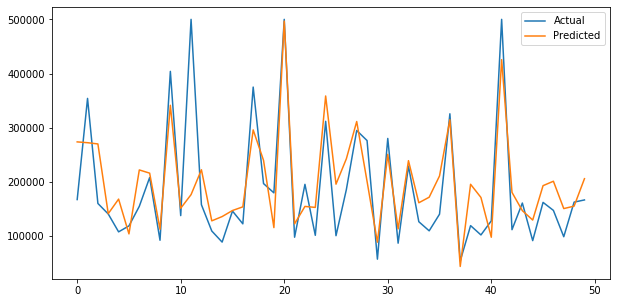

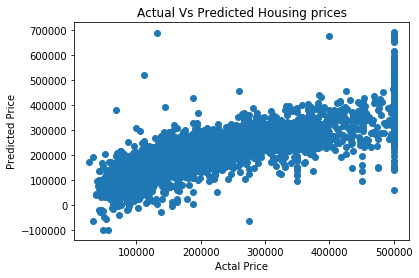

In [77]:
#Visualizing results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(act_pred[:50])
plt.legend(['Actual','Predicted'])
plt.show()
plt.scatter(act_pred.median_house_value,act_pred.Predicted)
plt.xlabel('Actal Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Housing prices')
plt.show()

In [81]:
#7. Bonus exercise: Perform Linear Regression with one independent variable :
#Extract just the median_income column from the independent variables (from X_train and X_test)
x_train_subset=pd.DataFrame(x_train.median_income)
print(x_train_subset)

x_test_subset=pd.DataFrame(x_test.median_income)
print(x_test_subset)

       median_income
12346         2.5212
19326         2.6316
16824         5.1550
6869          2.8229
16677         1.9653
...              ...
9372          4.1250
7291          1.2059
17728         5.5336
7293          2.2059
17673         2.6763

[16512 rows x 1 columns]
       median_income
20303         5.2783
16966         3.9722
10623         4.5094
6146          3.1034
2208          4.6726
...              ...
3263          2.2188
11694         7.1425
1729          3.9773
5087          0.9337
6581          7.8375

[4128 rows x 1 columns]


In [82]:
#Perform Linear Regression to predict housing values based on median_income
houses_model_new=lm.fit(x_train_subset,y_train)

#Predict output for test dataset using the fitted model
y_pred1=houses_model_new.predict(x_test_subset)
y_pred1

array([[265614.76463655],
       [211008.80136372],
       [233468.27879283],
       ...,
       [211222.0242507 ],
       [ 83973.94997063],
       [372610.84549394]])

In [86]:
#Print root mean squared error (RMSE) from Linear Regression
from sklearn import metrics
import numpy as np
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred1,y_test)))

RMSE: 84481.61112913226


In [87]:
#Comparing actual vs predicted house prices
y_pred1=pd.DataFrame(y_pred1,columns=['Predicted'])
act_pred1=pd.concat([y_test.reset_index(drop=True),y_pred1],axis=1)
act_pred1

,median_house_value,Predicted
0,167400,265614.764637
1,354100,211008.801364
2,160200,233468.278793
3,140800,174685.655440
4,107800,240291.411176
...,...,...
4123,106300,137701.936650
4124,393700,343554.001091
4125,131300,211222.024251
4126,92300,83973.949971


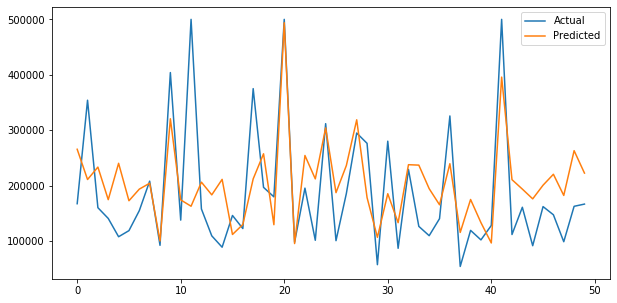

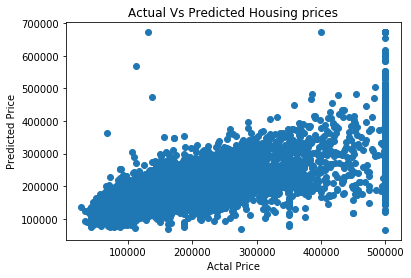

In [89]:
#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
#Visualizing results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(act_pred1[:50])
plt.legend(['Actual','Predicted'])
plt.show()
plt.scatter(act_pred1.median_house_value,act_pred1.Predicted)
plt.xlabel('Actal Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Housing prices')
plt.show()